In [2]:
# Analyzing University Data with SQL

In [3]:
import os
import requests
import copy
import sqlite3
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt

try:
    get_ipython().run_line_magic('matplotlib', 'inline') # running from notebook, show plots
except NameError:
    pass # Not running from notebook, no need to plot
    
import math
import numpy as np

In [4]:
# Plotting functions

def bar_plot(df, x, y):
    """bar_plot(df, x, y) takes in a DataFrame 'df' and displays 
    a bar plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis"""
    
    ax = df.plot.bar(x=x, y=y, color='black', legend=False)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

def scatter_plot(df, x, y):
    """scatter_plot(df, x, y) takes in a DataFrame 'df' and displays 
    a scatter plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis"""
    ax = df.plot.scatter(x=x, y=y, color='black', legend=False)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

def horizontal_bar_plot(df, y):
    """horizontal_bar_plot(df, y) takes in a DataFrame 'df' and displays 
    a horizontal bar plot with the column 'y' as the y-axis, and all
    other columns of 'df' on the x-axis"""
    df = df.set_index(y)
    ax = df.plot.barh()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))
    plt.show()

def pie_plot(df, x, y, title=None):
    """pie_plot(df, x, y, title) takes in a DataFrame 'df' and displays 
    a pie plot with the column 'x' as the x-axis, the (numeric) column
    'y' as the y-axis, and the 'title' as the title of the plot"""
    df = df.set_index(x)
    ax = df.plot.pie(y=y, legend=False)
    ax.set_ylabel(None)
    ax.set_title(title)
    plt.show()

def get_regression_coeff(df, x, y):
    """get_regression_coeff(df, x, y) takes in a DataFrame 'df' and returns 
    the slope (m) and the y-intercept (b) of the line of best fit in the
    plot with the column 'x' as the x-axis, and the column 'y' as the y-axis"""
    df["1"] = 1
    res = np.linalg.lstsq(df[[x, "1"]], df[y], rcond=None)
    coefficients = res[0]
    m = coefficients[0]
    b = coefficients[1]
    return (m, b)

def get_regression_line(df, x, y):
    """get_regression_line(df, x, y) takes in a DataFrame 'df' and returns 
    a DataFrame with an additional column "fit" of the line of best fit in the
    plot with the column 'x' as the x-axis, and the column 'y' as the y-axis"""
    # TODO: use the 'get_regression_coeff' function to get the slope and
    #       intercept of the line of best fit
    slope_int = get_regression_coeff(df, x, y)
    # TODO: save them into variables m and b respectively
    m = slope_int[0]
    b = slope_int[1]
    # TODO: create a new column in the dataframe called 'fit', which is
    #       calculated as df['fit'] = m * df[x] + b
    df['fit'] = m * df[x] + b
    # TODO: return the DataFrame df
    return df

def regression_line_plot(df, x, y):
    """regression_line_plot(df, x, y) takes in a DataFrame 'df' and displays
    a scatter plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis, as well as the best fit line for the plot"""
    # use 'get_regression_line' to get the data for the best fit line.
    df = get_regression_line(df, x, y)
    # use df.plot.scatter (not scatter_plot) to plot the x and y columns
    # of 'df' in black color.
    # save the return value of df.plot.scatter to a variable called 'ax'
    ax = df.plot.scatter(x=x, y=y, color='black')
    # use df.plot.line to plot the fitted line in red,
    # using ax=ax as a keyword argument.
    # this ensures that both the scatter plot and line end up on the same plot
    # play careful attention to what the 'x' and 'y' arguments ought to be
    df.plot.line(x=x, y='fit', c='red', ax=ax)
    plt.show()



In [5]:
def download(url, filename):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    else:
        try:
            r = requests.get(url)
            r.raise_for_status()
            data = r.text
            f = open(filename,"w", encoding="utf-8")
            f.write(data)
            f.close()
            return (str(filename) + " created!")
        except requests.HTTPError:
            return "Download failed!"

In [6]:
download("https://cs220.cs.wisc.edu/projects/data/rankings2.json", "rankings.json")
rankings = pd.read_json("rankings.json")
conn = sqlite3.connect('rankings.db')
rankings.to_sql("rankings", conn, if_exists="replace", index=False)

1500

In [7]:
# confirming variables defined correctly
pd.read_sql("SELECT * FROM rankings LIMIT 5", conn)

,Year,Rank,Institution Name,Country,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Overall
0,2022,1,Massachusetts Institute of Technology (MIT),United States,100.0,100.0,100.0,100.0,100.0,91.4,None,None,None,100.0
1,2022,2,University of Oxford,United Kingdom,100.0,100.0,100.0,96.0,99.5,98.5,None,None,None,99.5
2,2022,3,Stanford University,United States,100.0,100.0,100.0,99.9,99.8,67.0,None,None,None,98.7
3,2022,3,University of Cambridge,United Kingdom,100.0,100.0,100.0,92.1,100.0,97.7,None,None,None,98.7
4,2022,5,Harvard University,United States,100.0,100.0,99.1,100.0,84.2,70.1,None,None,None,98.0


In [8]:
# Question 1: List all the statistics of the institution with the Institution Name University of Wisconsin-Madison.

uw_stats = pd.read_sql("select * from rankings where `Institution Name`='University of Wisconsin-Madison' order by `Year`", conn)

uw_stats

,Year,Rank,Institution Name,Country,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Overall
0,2022,75,University of Wisconsin-Madison,United States,83.4,52.8,69.2,58.4,8.1,27.5,NaN,NaN,NaN,66.2
1,2023,83,University of Wisconsin-Madison,United States,82.4,48.1,70.6,41.9,37.7,23.8,93.2,84.6,NaN,63.7
2,2024,102,University of Wisconsin-Madison,United States,80.2,47.8,61.3,37.4,30.9,22.8,83.6,73.1,83.7,60.0


In [9]:
# Question 2: What are the top 10 institutions in Japan which had the highest score of International Students in the Year 2024?

japan_top_10_inter = pd.read_sql("select `Institution Name`, `International Students` from rankings where `Year`=2024 and `Country`='Japan' order by `International Students` desc limit 10", conn)

japan_top_10_inter

,Institution Name,International Students
0,Tokyo Institute of Technology (Tokyo Tech),31.7
1,The University of Tokyo,29.2
2,Waseda University,28.6
3,Kyushu University,25.6
4,Hitotsubashi University,22.4
5,University of Tsukuba,21.2
6,Kyoto University,20.8
7,Nagoya University,19.1
8,Hokkaido University,14.4
9,Tohoku University,13.8


In [10]:
# Question 3: What are the top 10 institutions in the United States which had the highest reputation in the Year 2023?

us_top_10_rep = pd.read_sql("SELECT `Institution Name`, (`Academic Reputation` + `Employer Reputation`) AS `Reputation` FROM rankings WHERE `Year`=2023 and `Country`='United States' ORDER BY `Reputation` DESC, `Institution Name` LIMIT 10", conn)

us_top_10_rep

,Institution Name,Reputation
0,Harvard University,200.0
1,Massachusetts Institute of Technology (MIT),200.0
2,Stanford University,200.0
3,"University of California, Berkeley (UCB)",200.0
4,"University of California, Los Angeles (UCLA)",199.9
5,Yale University,199.9
6,Princeton University,198.8
7,Columbia University,197.8
8,New York University (NYU),194.9
9,University of Chicago,191.4


In [11]:
# Question 4: What are the top 10 countries which had the most institutions listed in the Year 2022?

top_10_countries = pd.read_sql("select `country`, count(`country`) as `Number of Institutions` from rankings where `year`=2022 group by `country` order by `Number of Institutions` DESC, `Country` limit 10", conn)

top_10_countries

,Country,Number of Institutions
0,United States,87
1,United Kingdom,49
2,Germany,31
3,Australia,26
4,China (Mainland),26
5,Russia,17
6,Canada,16
7,Japan,16
8,South Korea,16
9,Italy,14


In [12]:
# Question 5: Create a bar plot using the data from Question 4 with the Country on the x-axis and the Number of Institutions on the y-axis.

all_countries = pd.read_sql("SELECT `country`, COUNT(`country`) AS `Number of Institutions`\
                            FROM rankings \
                            WHERE `year`=2022 \
                            GROUP BY `country` \
                            ORDER BY `Number of Institutions` DESC, `Country`", conn)

top_10_countries = all_countries.head(10)

other_countries_count = all_countries['Number of Institutions'][10:].sum()

other_row = pd.DataFrame({'Country': ['Other'], 'Number of Institutions': [other_countries_count]})

num_institutions = pd.concat([top_10_countries, other_row])
num_institutions

,Country,Number of Institutions
0,United States,87
1,United Kingdom,49
2,Germany,31
3,Australia,26
4,China (Mainland),26
5,Russia,17
6,Canada,16
7,Japan,16
8,South Korea,16
9,Italy,14


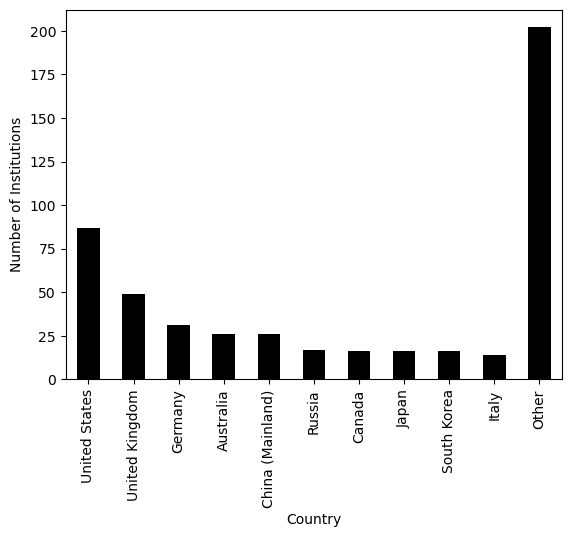

In [13]:
bar_plot(num_institutions, 'Country', 'Number of Institutions')

In [14]:
# Question 6: Create a bar plot of the top 10 countries with the highest total Overall listed in the year 2022.

top_10_total_score = pd.read_sql("""SELECT `Country`, SUM(`Overall`) as `Total Score` \
                                    FROM rankings\
                                    WHERE `Year` = 2022
                                    GROUP BY `Country`\
                                    ORDER BY `Total Score` DESC\
                                    LIMIT 10""", conn)
                                    
                                    

top_10_total_score

,Country,Total Score
0,United States,4441.9
1,United Kingdom,2543.8
2,Australia,1243.3
3,Germany,1235.3
4,China (Mainland),1138.5
5,Japan,796.3
6,Canada,785.6
7,South Korea,739.1
8,Netherlands,673.6
9,Russia,582.6


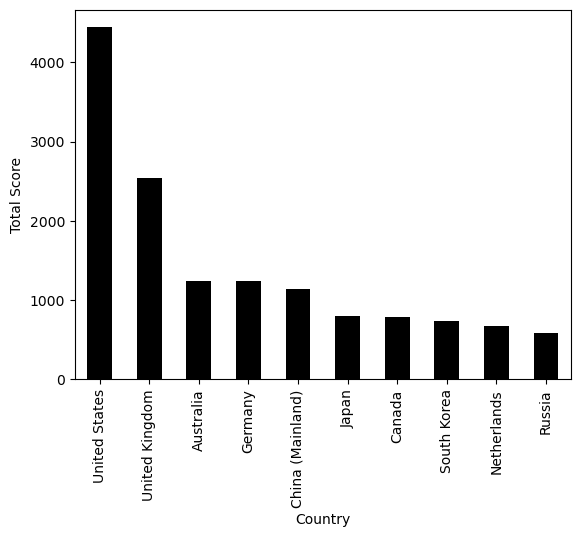

In [15]:
bar_plot(top_10_total_score, 'Country', 'Total Score')

In [16]:
# Question 7: What are the top 10 institutions in the United States which had the highest International Score in the Year 2024?

top_10_inter_score = pd.read_sql("""SELECT `Institution Name`, `International Faculty` + `International Students`AS `International Score`\
                                    FROM rankings\
                                    WHERE `Year` = 2024 and `Country` = 'United States'\
                                    ORDER BY `International Score` DESC\
                                    LIMIT 10""", conn)

top_10_inter_score

,Institution Name,International Score
0,Massachusetts Institute of Technology (MIT),188.2
1,Rice University,185.8
2,California Institute of Technology (Caltech),181.0
3,Yale University,168.6
4,University of Pennsylvania,166.3
5,University of Chicago,165.6
6,University of Rochester,163.1
7,"University of California, Berkeley (UCB)",156.1
8,Johns Hopkins University,155.8
9,Northeastern University,154.5


In [17]:
# Question 8: Create a scatter plot representing the Citations per Faculty (on the x-axis) against the Overall (on the y-axis) of each institution in the Year 2024.

citations_overall = pd.read_sql("""SELECT `Citations per Faculty`, `Overall`\
                                    FROM rankings
                                    WHERE `year` = 2024""", conn)

citations_overall.head()

,Citations per Faculty,Overall
0,100.0,100.0
1,92.3,99.2
2,90.6,98.9
3,100.0,98.3
4,99.9,98.1


/Users/theovasilopoulos/opt/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


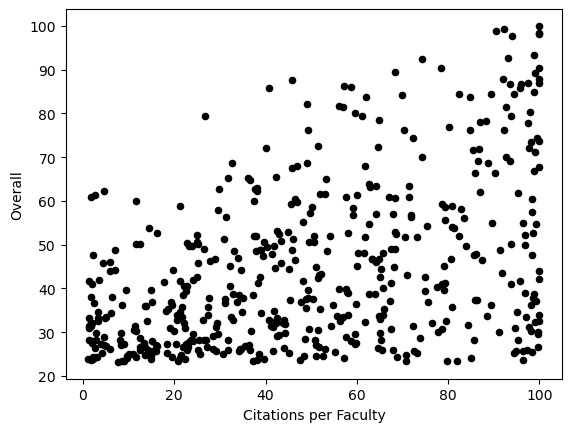

In [18]:
scatter_plot(citations_overall, 'Citations per Faculty', 'Overall')

In [19]:
# Question 9: Create a scatter plot representing the Academic Reputation (on the x-axis) against the Employer Reputation (on the y-axis) of each institution from the United States in the Year 2023.

reputations_usa = pd.read_sql("""SELECT `Academic Reputation`, `Employer Reputation`\
                                FROM rankings\
                                WHERE `Year` = 2023 and `Country` = 'United States'""", conn)
                                

reputations_usa.head()

,Academic Reputation,Employer Reputation
0,100.0,100.0
1,100.0,100.0
2,100.0,100.0
3,96.5,87.1
4,99.2,92.2


/Users/theovasilopoulos/opt/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


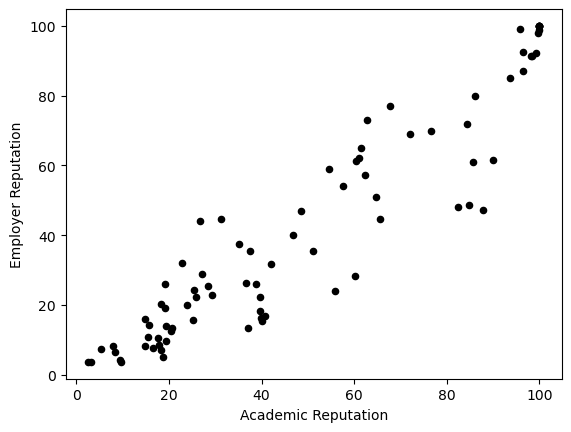

In [20]:
scatter_plot(reputations_usa, 'Academic Reputation', 'Employer Reputation')

In [21]:
# Question 10: Create a scatter plot representing the International Students (on the x-axis) against the Faculty Student (on the y-axis) for the top ranked institution of each Country in the Year 2023.

top_ranked_inter_faculty = pd.read_sql("""SELECT `Country`, `Faculty Student`, `International Students`, MIN(`Rank`)\
                                            FROM rankings\
                                            WHERE `Year` = 2023
                                            GROUP BY `Country`""", conn)
                                            

top_ranked_inter_faculty.head()

,Country,Faculty Student,International Students,MIN(`Rank`)
0,Argentina,76.0,68.9,67
1,Australia,38.0,96.0,30
2,Austria,24.2,89.2,151
3,Belarus,96.8,48.2,288
4,Belgium,7.7,43.3,76


/Users/theovasilopoulos/opt/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


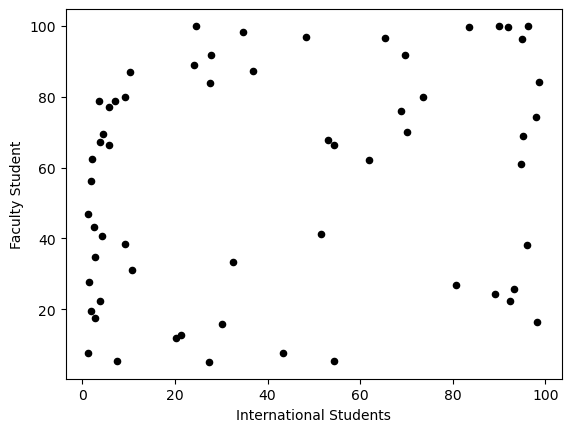

In [22]:
scatter_plot(top_ranked_inter_faculty, 'International Students', 'Faculty Student')

In [23]:
# Question 11: Find the correlation between International Students and Overall for institutions from the Country United Kingdom with a Rank less than or equal to 100 in the Year 2022.

df_11 = pd.read_sql("""SELECT `International Students`, `Overall`\
                        FROM rankings\
                        WHERE `Year` = 2022 AND `Country` = 'United Kingdom' AND `Rank` <= 100""", conn)
                        
uk_inter_score_corr = df_11.corr().loc['International Students', 'Overall']
uk_inter_score_corr


0.4534457221342218

In [24]:
# Question 12: Find the correlation between Citations per International and Overall for all institutions in the Year 2024.

df_12 = pd.read_sql("""SELECT (`Citations per Faculty` * `International Faculty`) / 100 AS `Citations per International`, `Overall`\
                    FROM rankings\
                    WHERE `Year` = 2024""", conn)
cit_per_inter_score_corr = df_12.corr().loc['Citations per International', 'Overall']
cit_per_inter_score_corr

0.5943163420092246

In [25]:
# Question 13: What are the top 15 countries with the highest total of Citations per International in the Year 2024.

top_cit_per_inter = pd.read_sql("""SELECT `Country`, SUM((`Citations per Faculty` * `International Faculty`) / 100) AS `Sum of International Citations`\
                                FROM rankings\
                                WHERE `Year` = 2024\
                                GROUP BY `COUNTRY`\
                                ORDER BY `Sum of International Citations` DESC\
                                LIMIT 15""", conn)

top_cit_per_inter

,Country,Sum of International Citations
0,United States,2294.2671
1,United Kingdom,2279.9530
2,Australia,1895.6595
3,Canada,822.9573
4,Netherlands,749.9450
5,Switzerland,664.2349
6,Germany,635.0223
7,China (Mainland),578.7473
8,Hong Kong SAR,513.1582
9,France,385.9691


In [26]:
#Question 14: Among the institutions ranked within the top 300 in the Year 2023, find the average Citations per International for each Country.

avg_cit_per_inter = pd.read_sql("""SELECT `Country`, AVG((`Citations per Faculty` * `International Faculty`) / 100) AS `Average Citations per International`\
                                FROM rankings\
                                WHERE `Year` = 2023 AND `Rank` <= 300 and (`Citations per Faculty` IS NOT NULL AND `International Faculty` IS NOT NULL)\
                                GROUP BY `Country`\
                                ORDER BY `Average Citations per International` DESC""", conn)
                                
                                

avg_cit_per_inter

,Country,Average Citations per International
0,Singapore,92.950000
1,Australia,82.001726
2,Hong Kong SAR,78.318000
3,Switzerland,78.004875
4,Netherlands,58.039117
5,United Kingdom,56.838479
6,Sweden,52.991567
7,Canada,48.342191
8,Denmark,47.686267
9,Belgium,47.580433


In [27]:
# Question 15 Find the institution with the highest value of Citations per International for each Country in the Year 2024.

max_cit_per_inter = pd.read_sql("""SELECT `Country`, `Institution Name`, MAX(`Citations per Faculty` * `International Faculty`) / 100 AS `Maximum Citations per International`\
                                FROM rankings\
                                WHERE `Year` = 2024\
                                GROUP BY `Country`
                                HAVING `Maximum Citations per International` IS NOT NULL
                                ORDER BY `Maximum Citations per International` DESC""", conn)

max_cit_per_inter

,Country,Institution Name,Maximum Citations per International
0,United States,Massachusetts Institute of Technology (MIT),100.0000
1,Hong Kong SAR,City University of Hong Kong,99.9000
2,Switzerland,University of Bern,99.2000
3,Australia,The University of Western Australia,98.9000
4,Canada,Western University,98.0051
5,Macau SAR,University of Macau,96.9000
6,China (Mainland),Zhejiang University,95.3552
7,Singapore,"Nanyang Technological University, Singapore (NTU)",94.4000
8,United Kingdom,Imperial College London,94.0000
9,France,Institut Polytechnique de Paris,92.3930


In [28]:
# Question 16: Among the institutions with a Rank less than or equal to 50 in the Year 2022, create a horizontal bar plot representing the average of both theCitations per Faculty and International Faculty scores for all institutions in each Country.

country_citations_inter = pd.read_sql("""SELECT `Country`, AVG(`Citations per Faculty`) AS `Average Citations per Faculty`, AVG(`International Faculty`) AS `Average International Faculty`\
                                        FROM rankings\
                                        WHERE `Rank` <= 50 and `Year` = 2022\
                                        GROUP BY `Country`\
                                        ORDER BY `Average Citations per Faculty` - `Average International Faculty`""", conn)

country_citations_inter

,Country,Average Citations per Faculty,Average International Faculty
0,Canada,57.033333,93.3000
1,Germany,27.200000,56.9000
2,United Kingdom,77.937500,98.9375
3,Hong Kong SAR,81.166667,100.0000
4,Australia,91.180000,99.4200
5,Singapore,93.050000,100.0000
6,France,73.350000,75.9000
7,Switzerland,99.800000,100.0000
8,United States,83.700000,65.9000
9,China (Mainland),84.240000,55.5400


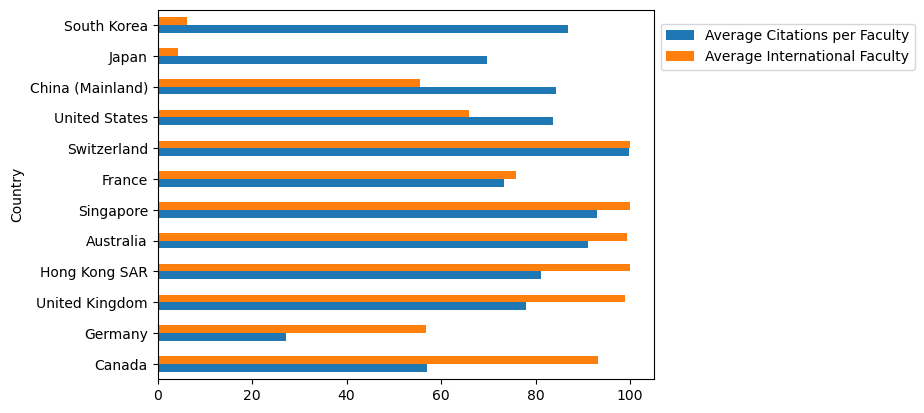

In [29]:
horizontal_bar_plot(country_citations_inter, 'Country')

In [30]:
# Question 17: Create a scatter plot representing the Overall (on the x-axis) against the Rank (on the y-axis) for all institutions in the Year 2022. Additionally, plot a regression line within the same plot.

overall_rank = pd.read_sql("""SELECT `Rank`, `Overall`\
            FROM rankings\
            WHERE `Year` = 2022\
            ORDER BY `Rank`""", conn)

overall_rank = get_regression_line(overall_rank, 'Overall', 'Rank')
overall_rank.head()

,Rank,Overall,1,fit
0,1,100.0,1,-142.320024
1,2,99.5,1,-138.773723
2,3,98.7,1,-133.099642
3,3,98.7,1,-133.099642
4,5,98.0,1,-128.134821


/Users/theovasilopoulos/opt/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


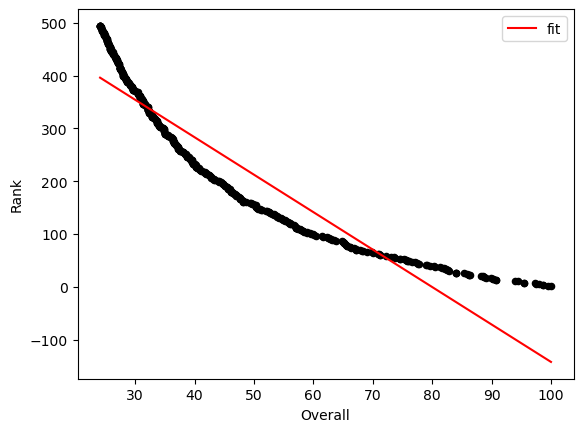

In [31]:
regression_line_plot(overall_rank, 'Overall', 'Rank')

In [32]:
# Question 18: Create a scatter plot representing the inverse of the Overall (on the x-axis) against the Rank (on the y-axis) for all institutions in the Year 2022. Additionally, plot a regression line within the same plot.

df_18 = pd.read_sql("""SELECT `Rank`, 1 / `Overall` AS `Inverse Overall`\
            FROM rankings\
            WHERE `Year` = 2022""", conn)
inverse_overall_rank = get_regression_line(df_18, 'Inverse Overall', 'Rank')
inverse_overall_rank.head()

,Rank,Inverse Overall,1,fit
0,1,0.010000,1,-3.168433
1,2,0.010050,1,-2.371054
2,3,0.010132,1,-1.078443
3,3,0.010132,1,-1.078443
4,5,0.010204,1,0.069903


/Users/theovasilopoulos/opt/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


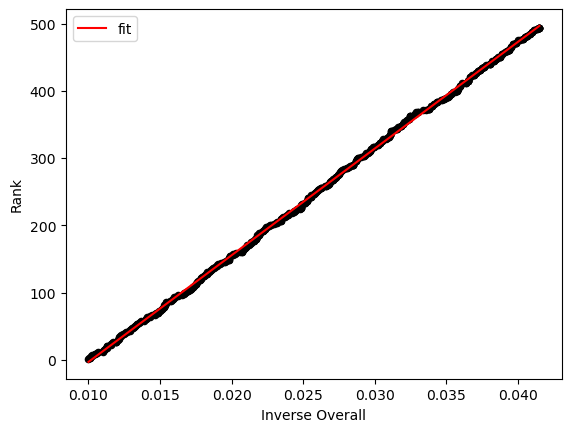

In [33]:
regression_line_plot(df_18, 'Inverse Overall', 'Rank')

In [34]:
# Question 19: Use the regression line to estimate the Rank of an institution with an Overall of 72.

coeff_19 = get_regression_coeff(inverse_overall_rank, 'Inverse Overall', 'Rank')
rank_score_72 = math.ceil(coeff_19[0] * (1/72) + coeff_19[1])
rank_score_72

59

In [35]:
conn.close()